In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split

#import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [2]:
# Importing and Processing the dataset

train_dir = r"C:\Users\Medvall\Downloads\Programs\training_set\cats"

train_images = []
train_labels = []

for img in tqdm(os.listdir(train_dir)):
    try:
        img_r = cv2.imread(os.path.join(train_dir, img), cv2.IMREAD_GRAYSCALE)
        train_images.append(np.array(cv2.resize(img_r, (50, 50), interpolation=cv2.INTER_CUBIC)))
        if 'dog' in img:
            train_labels.append(1)
        else:
            train_labels.append(0)
    except Exception as e:
        print('broken image')

100%|█████████▉| 7892/7896 [07:16<00:00, 17.74it/s]

broken image


100%|██████████| 7896/7896 [07:16<00:00, 18.09it/s]


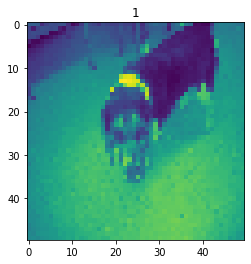

In [3]:
# Visualising the image

plt.title(train_labels[5896])
_ = plt.imshow(train_images[5896])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print("Train Shape:" + str(x_train.shape))
print("Test Shape:" + str(x_test.shape))

Train Shape:(7105, 50, 50)
Test Shape:(790, 50, 50)


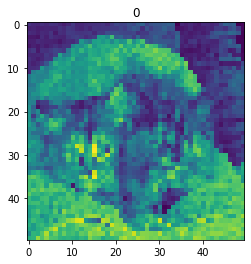

In [10]:
plt.title(y_train[2])
_ = plt.imshow(x_train[2])

In [11]:
type(x_train)

numpy.ndarray

In [12]:
def baseline_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 1), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [13]:
model = baseline_model()

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [16]:
x_train = x_train.reshape(-1, 50, 50, 1)
x_test = x_test.reshape(-1, 50, 50, 1)

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#history = model.fit(np.array(x_train), y_train, epochs=20, verbose=1)
history = model.fit(np.array(x_train), y_train, validation_data=(np.array(x_test), y_test), epochs=20, verbose=1)

Train on 7105 samples, validate on 790 samples
Epoch 1/20


5632/7105 [======================>.......] - ETA: 1:13:31 - loss: 5.2565 - accuracy: 0.437 - ETA: 1:11:24 - loss: 7.7754 - accuracy: 0.437 - ETA: 1:06:29 - loss: 6.5181 - accuracy: 0.406 - ETA: 1:06:53 - loss: 5.1059 - accuracy: 0.414 - ETA: 1:02:34 - loss: 4.2659 - accuracy: 0.418 - ETA: 1:00:34 - loss: 3.7081 - accuracy: 0.416 - ETA: 59:19 - loss: 3.2813 - accuracy: 0.4286  - ETA: 57:33 - loss: 2.9723 - accuracy: 0.425 - ETA: 57:26 - loss: 2.7247 - accuracy: 0.423 - ETA: 56:09 - loss: 2.5234 - accuracy: 0.428 - ETA: 54:48 - loss: 2.3583 - accuracy: 0.429 - ETA: 53:45 - loss: 2.2228 - accuracy: 0.432 - ETA: 53:10 - loss: 2.1050 - accuracy: 0.444 - ETA: 52:34 - loss: 2.0079 - accuracy: 0.446 - ETA: 51:51 - loss: 1.9210 - accuracy: 0.443 - ETA: 51:10 - loss: 1.8434 - accuracy: 0.455 - ETA: 50:25 - loss: 1.7730 - accuracy: 0.468 - ETA: 50:04 - loss: 1.7151 - accuracy: 0.465 - ETA: 49:18 - loss: 1.6614 - accuracy: 0.465 - ETA: 49:03 - loss: 1.6140 - accuracy: 0.464 - ETA: 48:49 - loss: 1.

5632/7105 [======================>.......] - ETA: 1:04:35 - loss: 0.6691 - accuracy: 0.625 - ETA: 1:08:18 - loss: 0.6815 - accuracy: 0.531 - ETA: 1:21:58 - loss: 0.6848 - accuracy: 0.552 - ETA: 1:17:11 - loss: 0.6883 - accuracy: 0.539 - ETA: 1:17:50 - loss: 0.6881 - accuracy: 0.550 - ETA: 1:17:08 - loss: 0.6893 - accuracy: 0.536 - ETA: 1:13:39 - loss: 0.6898 - accuracy: 0.522 - ETA: 1:09:58 - loss: 0.6897 - accuracy: 0.519 - ETA: 1:07:13 - loss: 0.6899 - accuracy: 0.513 - ETA: 1:05:41 - loss: 0.6898 - accuracy: 0.506 - ETA: 1:06:16 - loss: 0.6898 - accuracy: 0.511 - ETA: 1:05:16 - loss: 0.6892 - accuracy: 0.510 - ETA: 1:04:08 - loss: 0.6891 - accuracy: 0.512 - ETA: 1:03:42 - loss: 0.6882 - accuracy: 0.526 - ETA: 1:03:50 - loss: 0.6891 - accuracy: 0.520 - ETA: 1:05:10 - loss: 0.6896 - accuracy: 0.519 - ETA: 1:05:39 - loss: 0.6905 - accuracy: 0.518 - ETA: 1:05:26 - loss: 0.6901 - accuracy: 0.524 - ETA: 1:05:02 - loss: 0.6889 - accuracy: 0.529 - ETA: 1:04:04 - loss: 0.6897 - accuracy: 0.5

7105/7105 [==============================] - ETA: 13:17 - loss: 0.6903 - accuracy: 0.531 - ETA: 12:58 - loss: 0.6901 - accuracy: 0.532 - ETA: 12:40 - loss: 0.6900 - accuracy: 0.533 - ETA: 12:22 - loss: 0.6900 - accuracy: 0.533 - ETA: 12:04 - loss: 0.6898 - accuracy: 0.534 - ETA: 11:46 - loss: 0.6897 - accuracy: 0.535 - ETA: 11:28 - loss: 0.6897 - accuracy: 0.535 - ETA: 11:10 - loss: 0.6897 - accuracy: 0.535 - ETA: 10:53 - loss: 0.6898 - accuracy: 0.535 - ETA: 10:36 - loss: 0.6895 - accuracy: 0.536 - ETA: 10:19 - loss: 0.6894 - accuracy: 0.535 - ETA: 10:02 - loss: 0.6891 - accuracy: 0.536 - ETA: 9:44 - loss: 0.6890 - accuracy: 0.536 - ETA: 9:27 - loss: 0.6892 - accuracy: 0.53 - ETA: 9:09 - loss: 0.6891 - accuracy: 0.53 - ETA: 8:51 - loss: 0.6890 - accuracy: 0.53 - ETA: 8:32 - loss: 0.6890 - accuracy: 0.53 - ETA: 8:14 - loss: 0.6887 - accuracy: 0.53 - ETA: 7:55 - loss: 0.6887 - accuracy: 0.53 - ETA: 7:37 - loss: 0.6884 - accuracy: 0.53 - ETA: 7:19 - loss: 0.6883 - accuracy: 0.53 - ETA: 7

5728/7105 [=======================>......] - ETA: 43:52 - loss: 0.8244 - accuracy: 0.562 - ETA: 44:41 - loss: 0.8642 - accuracy: 0.484 - ETA: 44:21 - loss: 0.8161 - accuracy: 0.468 - ETA: 45:43 - loss: 0.7895 - accuracy: 0.492 - ETA: 45:19 - loss: 0.7640 - accuracy: 0.550 - ETA: 44:56 - loss: 0.7492 - accuracy: 0.557 - ETA: 44:31 - loss: 0.7414 - accuracy: 0.553 - ETA: 44:16 - loss: 0.7329 - accuracy: 0.558 - ETA: 43:38 - loss: 0.7320 - accuracy: 0.538 - ETA: 43:03 - loss: 0.7285 - accuracy: 0.537 - ETA: 42:23 - loss: 0.7233 - accuracy: 0.542 - ETA: 41:56 - loss: 0.7210 - accuracy: 0.541 - ETA: 41:38 - loss: 0.7219 - accuracy: 0.526 - ETA: 41:10 - loss: 0.7195 - accuracy: 0.522 - ETA: 41:01 - loss: 0.7171 - accuracy: 0.522 - ETA: 40:52 - loss: 0.7175 - accuracy: 0.513 - ETA: 40:51 - loss: 0.7162 - accuracy: 0.511 - ETA: 40:24 - loss: 0.7132 - accuracy: 0.513 - ETA: 40:09 - loss: 0.7125 - accuracy: 0.509 - ETA: 39:47 - loss: 0.7124 - accuracy: 0.503 - ETA: 39:16 - loss: 0.7105 - accurac

5760/7105 [=======================>......] - ETA: 23:12 - loss: 0.6400 - accuracy: 0.687 - ETA: 21:16 - loss: 0.6513 - accuracy: 0.671 - ETA: 22:06 - loss: 0.6848 - accuracy: 0.562 - ETA: 22:21 - loss: 0.6859 - accuracy: 0.539 - ETA: 22:09 - loss: 0.6842 - accuracy: 0.537 - ETA: 22:15 - loss: 0.6860 - accuracy: 0.526 - ETA: 21:45 - loss: 0.6831 - accuracy: 0.540 - ETA: 21:56 - loss: 0.6803 - accuracy: 0.543 - ETA: 21:54 - loss: 0.6814 - accuracy: 0.545 - ETA: 21:44 - loss: 0.6830 - accuracy: 0.534 - ETA: 21:43 - loss: 0.6816 - accuracy: 0.548 - ETA: 21:27 - loss: 0.6818 - accuracy: 0.552 - ETA: 21:15 - loss: 0.6812 - accuracy: 0.548 - ETA: 21:22 - loss: 0.6805 - accuracy: 0.553 - ETA: 21:09 - loss: 0.6805 - accuracy: 0.552 - ETA: 21:01 - loss: 0.6787 - accuracy: 0.558 - ETA: 20:51 - loss: 0.6805 - accuracy: 0.547 - ETA: 20:42 - loss: 0.6794 - accuracy: 0.550 - ETA: 20:38 - loss: 0.6800 - accuracy: 0.552 - ETA: 20:30 - loss: 0.6820 - accuracy: 0.546 - ETA: 20:23 - loss: 0.6819 - accurac

7105/7105 [==============================] - ETA: 4:12 - loss: 0.6698 - accuracy: 0.59 - ETA: 4:06 - loss: 0.6695 - accuracy: 0.59 - ETA: 4:00 - loss: 0.6694 - accuracy: 0.59 - ETA: 3:54 - loss: 0.6693 - accuracy: 0.59 - ETA: 3:48 - loss: 0.6707 - accuracy: 0.59 - ETA: 3:42 - loss: 0.6706 - accuracy: 0.59 - ETA: 3:35 - loss: 0.6704 - accuracy: 0.59 - ETA: 3:29 - loss: 0.6707 - accuracy: 0.59 - ETA: 3:23 - loss: 0.6704 - accuracy: 0.59 - ETA: 3:17 - loss: 0.6709 - accuracy: 0.59 - ETA: 3:10 - loss: 0.6709 - accuracy: 0.59 - ETA: 3:04 - loss: 0.6713 - accuracy: 0.59 - ETA: 2:58 - loss: 0.6711 - accuracy: 0.59 - ETA: 2:52 - loss: 0.6712 - accuracy: 0.59 - ETA: 2:46 - loss: 0.6711 - accuracy: 0.59 - ETA: 2:40 - loss: 0.6714 - accuracy: 0.59 - ETA: 2:33 - loss: 0.6716 - accuracy: 0.59 - ETA: 2:27 - loss: 0.6718 - accuracy: 0.59 - ETA: 2:21 - loss: 0.6717 - accuracy: 0.59 - ETA: 2:15 - loss: 0.6718 - accuracy: 0.59 - ETA: 2:09 - loss: 0.6717 - accuracy: 0.59 - ETA: 2:03 - loss: 0.6717 - accu

5568/7105 [======================>.......] - ETA: 25:18 - loss: 0.6848 - accuracy: 0.656 - ETA: 23:12 - loss: 0.6718 - accuracy: 0.609 - ETA: 23:23 - loss: 0.6782 - accuracy: 0.572 - ETA: 23:42 - loss: 0.6615 - accuracy: 0.585 - ETA: 24:09 - loss: 0.6656 - accuracy: 0.575 - ETA: 25:05 - loss: 0.6594 - accuracy: 0.593 - ETA: 25:42 - loss: 0.6635 - accuracy: 0.580 - ETA: 25:57 - loss: 0.6664 - accuracy: 0.582 - ETA: 25:47 - loss: 0.6684 - accuracy: 0.583 - ETA: 10:49:23 - loss: 0.6682 - accuracy: 0.58 - ETA: 9:50:06 - loss: 0.6656 - accuracy: 0.5881 - ETA: 9:00:43 - loss: 0.6662 - accuracy: 0.585 - ETA: 8:19:16 - loss: 0.6653 - accuracy: 0.591 - ETA: 7:43:53 - loss: 0.6629 - accuracy: 0.593 - ETA: 7:13:28 - loss: 0.6673 - accuracy: 0.589 - ETA: 6:46:05 - loss: 0.6651 - accuracy: 0.597 - ETA: 6:22:09 - loss: 0.6694 - accuracy: 0.601 - ETA: 6:00:56 - loss: 0.6671 - accuracy: 0.604 - ETA: 5:41:44 - loss: 0.6642 - accuracy: 0.606 - ETA: 5:24:18 - loss: 0.6576 - accuracy: 0.612 - ETA: 5:08:39

In [9]:
hist = history.history

NameError: name 'history' is not defined

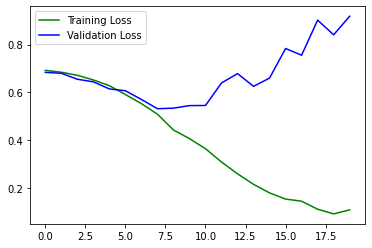

In [99]:
plt.plot(hist['loss'], 'green', label='Training Loss')
plt.plot(hist['val_loss'], 'blue', label='Validation Loss')
_ = plt.legend()

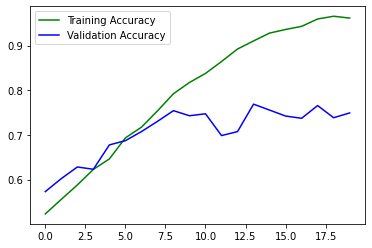

In [102]:
plt.plot(hist['accuracy'], 'green', label='Training Accuracy')
plt.plot(hist['val_accuracy'], 'blue', label='Validation Accuracy')
_ = plt.legend()


In [145]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_dir = r"C:\Users\Medvall\Downloads\Programs\validation_set\test"
test_images = []

for img in tqdm(os.listdir(test_dir)):
    try:
        img_r = cv2.imread(os.path.join(test_dir, img), cv2.IMREAD_GRAYSCALE)
        test_images.append(np.array(cv2.resize(img_r, (50, 50), interpolation=cv2.INTER_CUBIC)))
    except Exception as e:
        print('broken image')


100%|██████████| 6/6 [00:00<00:00, 60.01it/s]


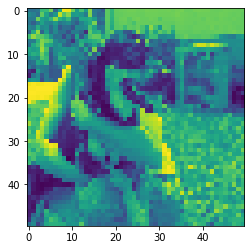

In [146]:
_ = plt.imshow(test_images[0])

In [147]:
test_images = np.array(test_images)
test_images = test_images.reshape(-1, 50, 50, 1)
predictions = model.predict(test_images)

In [166]:
for prd in predictions:
    print("Probability that it is a dog = ", "%.2f" % (1-prd))

Probability that it is a dog =  0.00
Probability that it is a dog =  0.01
Probability that it is a dog =  0.00
Probability that it is a dog =  0.99
Probability that it is a dog =  0.96
Probability that it is a dog =  1.00
